# Linear Regression Model for Predicting Charges from Insurance Dataset

## Libraries
#### pandas
For data manipulation and analysis.
#### OneHotEncoder
Encodes categorical variables into binary format.
#### train_test_split
Splits data into training and testing sets.
#### LinearRegression
Implements linear regression modeling.
#### mean_squared_error, mean_absolute_error, r2_score
Metrics to evaluate model performance.
#### matplotlib.pyplot
For creating visualizations and plots.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv('../dataset/insurance.csv')

## Drop duplicate rows

In [3]:
df = df.drop_duplicates()

## Drop lower predictive features
After model validation, it became evident that the features sex and region do not significantly contribute to improving the model's performance.

In [4]:
df = df.drop(columns=['sex', 'region'])

## Apply One Hot Encode

In [5]:
# Apply OneHotEncoder to the 'smoker' column
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['smoker']])

# Add the encoded column(s) back to the DataFrame
encoded_columns = encoder.get_feature_names_out(['smoker'])
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)
df = pd.concat([df.drop(columns=['smoker']), df_encoded], axis=1)

## Split data into train and test

In [6]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

# Perform train-test split with stratification based on the 'charges' column
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=4)  # Stratify into quartiles
)

## Linear Regresion Model creation and prediction

In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate Train and Test Performance

### Model Evaluation Metrics

In [8]:
# Predictions for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for train set
train_rmse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_rmse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Train RMSE: 36544862.81
Test RMSE: 37446546.15
Train MAE: 4147.40
Test MAE: 4188.49
Train R2: 0.7517
Test R2: 0.7399


### Scatter plot for train set

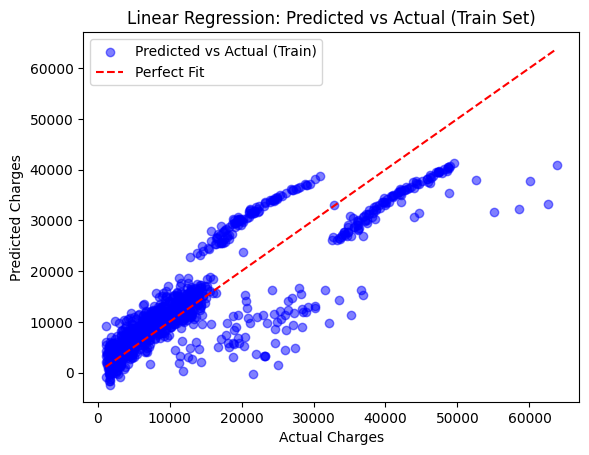

In [9]:
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Predicted vs Actual (Train)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Linear Regression: Predicted vs Actual (Train Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

### Scatter plot for test set

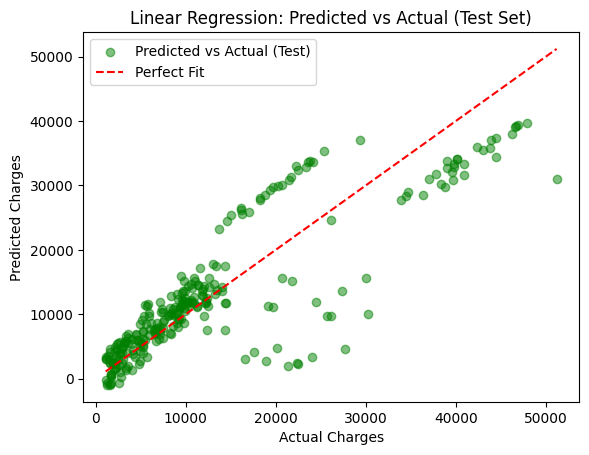

In [10]:
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Predicted vs Actual (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Linear Regression: Predicted vs Actual (Test Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()